# Import PyTorch and TensorFlow

In [1]:
# %tensorflow_version 2.x

In [2]:
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.0.0


In [3]:
import torch
print(f"pytorch version: {torch.__version__}")

pytorch version: 1.6.0


# Generating the datasets

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def generate_data(m=0.1, b=0.3, n=200):
    x = tf.random.uniform(shape=(n,),minval=-10,maxval=10) 
    noise = tf.random.normal(shape=(len(x),), stddev=0.15)
    y = (m * x + b ) + noise
    return x, y

## Data Visualization

Text(0, 0.5, 'y')

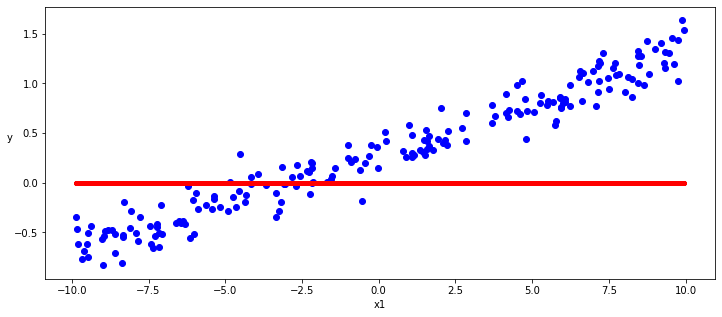

In [6]:
m = tf.Variable(0.)
b = tf.Variable(0.)
x, y = generate_data()
plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.scatter(x,y, c = "b", label="samples")
ax.plot(x,m*x+b,"-r",linewidth = 5.0,label = "model")
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

# TensorFlow Model

In [7]:
class LinearRegressionKeras:
    def __init__(self):
        self.params = {
            "w" : tf.Variable(0.),
            "b" : tf.Variable(0.)
        }        

    def __call__(self,x): 
        y_pred = self.params["w"] * x + self.params["b"]
        return y_pred

# PyTorch Model

In [8]:
# class LinearRegressionPyTorch(torch.nn.Module): 
#     def __init__(self): 
#         super(LinearRegressionPyTorch, self).__init__() 
#         self.w = torch.tensor([0.0])
#         self.b = torch.tensor([0.0])
  
#     def forward(self, x):  
#         return x @ self.w + self.b
    
    
class LinearRegressionPyTorch(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionPyTorch, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  

    def forward(self, x):
        out = self.linear(x)
        return out

# TensorFlow Training

In [9]:
epochs = 500
learning_rate = 0.001

def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

tf_model = LinearRegressionKeras()

for epoch in tf.range(1,epochs):
    with tf.GradientTape() as tape:
        predictions = tf_model(x)
        loss = squared_error(predictions, y)
    dloss_dw,dloss_db = tape.gradient(loss, [tf_model.params["w"], tf_model.params["b"]])
    # adjusting 
    tf_model.params["w"].assign(tf_model.params["w"] - learning_rate*dloss_dw)
    tf_model.params["b"].assign(tf_model.params["b"] - learning_rate*dloss_db)
    if epoch % 20 == 0:
        print(f"Step {epoch}, Loss {loss.numpy()}") # we print the loss only each 20 epochs

Step 20, Loss 0.12438808381557465
Step 40, Loss 0.09833744168281555
Step 60, Loss 0.0915316641330719
Step 80, Loss 0.0860544741153717
Step 100, Loss 0.08103595674037933
Step 120, Loss 0.07640500366687775
Step 140, Loss 0.07213012874126434
Step 160, Loss 0.06818386912345886
Step 180, Loss 0.06454100459814072
Step 200, Loss 0.06117815896868706
Step 220, Loss 0.05807384103536606
Step 240, Loss 0.05520814284682274
Step 260, Loss 0.05256276577711105
Step 280, Loss 0.05012074112892151
Step 300, Loss 0.04786644130945206
Step 320, Loss 0.04578544199466705
Step 340, Loss 0.0438644215464592
Step 360, Loss 0.04209107533097267
Step 380, Loss 0.040454041212797165
Step 400, Loss 0.038942851126194
Step 420, Loss 0.037547849118709564
Step 440, Loss 0.036260079592466354
Step 460, Loss 0.03507130593061447
Step 480, Loss 0.03397391736507416


# PyTorch Training

In [10]:
x, y = generate_data()
x = x.numpy()
y = y.numpy()
x = x.reshape(-1, 1)
# x.shape

inputs = torch.autograd.Variable(torch.from_numpy(x))
labels = torch.autograd.Variable(torch.from_numpy(y))


In [11]:
# epochs = 500
# learning_rate = 0.001

# def squared_error(y_pred, y_true):
#     diff = y_pred - y_true
#     return torch.sum(diff * diff) / diff.numel()


# torch_model = LinearRegressionPyTorch()

# # [w, b] = torch_model.parameters()

# optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.01)

# for epoch in range(epochs):
#     epoch_loss = 0
#     y_pred = torch_model(inputs)

#     loss = squared_error(y_pred, labels)

#     epoch_loss = loss.data[0]

#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
#     print("Epoch {} : Loss {}".format(epoch, epoch_loss))


# Data Visualization

Text(0, 0.5, 'y')

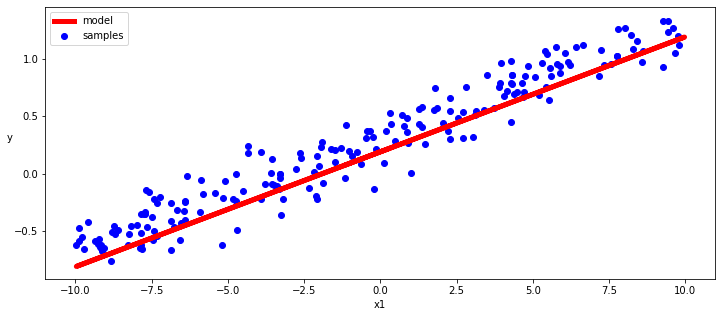

In [12]:
x_train, y_train = generate_data()
plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.scatter(x_train,y_train, c = "b", label="samples")
ax.plot(x, tf_model.params["w"] * x + tf_model.params["b"], "-r", linewidth = 5.0, label = "model")
ax.legend()
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)